In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
mpl.style.use('ggplot')
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

---
#Principal Components Analysis Demo
---

In [2]:
#This is a function that sets up a rotation matrix for a specified angle of rotation (in degrees)

def rot_matrix(angle_in_degrees):
    '''A function that returns a rotation matrix. If you multiply another matrix by the rotation
    matrix then the matrix points will undergo that rotation'''
    
    #convert angle into radians
    ang = angle_in_degrees * np.pi * 2.0 /360.0
    
    #create a matrix
    rot = np.zeros((2,2))
    
    #set the appropriate cells
    rot[0][0] = np.sin(ang)
    rot[0][1] = np.cos(ang)
    rot[1][0] = -np.sin(ang)
    rot[1][1] = np.cos(ang)
    
    #return the rotation matrix
    return rot

---
#Take some 2 dimensional data
---

The variance in direction 1 is  1.00
The variance in direction 1 is  0.06


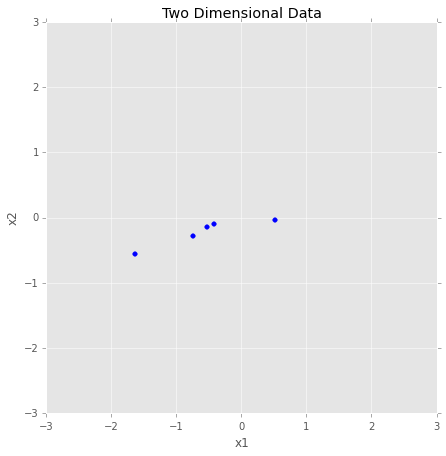

In [34]:
#generate some 2 dimensional data, where the variance is smaller in one dimension
m = 5
N = 2
np.random.seed(34)
std1 = 1.0
std2 = 0.25

X = np.zeros((m, N))
#Set X with some random normal data, in 1 dimesion the standard deviation is 1.0, and in the other it is 0.25
X[:,0] = np.random.normal(loc = 0.0, scale = std1, size = m)
X[:,1] = np.random.normal(loc = 0.0, scale = std2, size = m)

print "The variance in direction 1 is {:5.2f}".format(std1 * std1)
print "The variance in direction 1 is {:5.2f}".format(std2 * std2)

#Rotate the points in the matrix by 65 degrees
Xr = np.dot(X, rot_matrix(65.0))

#Plot the data
fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.scatter(Xr[:,0], Xr[:,1], color='blue', marker='o')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Two Dimensional Data")

---
#The aim is to reduce this data to a single dimension but retain as much information as possible
---

---
##We could just collapse it by one dimension
---

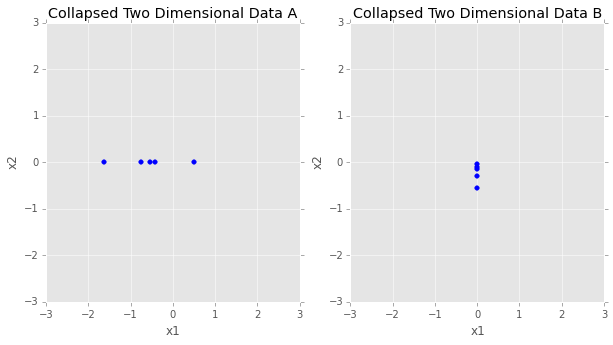

In [35]:
#create some points for zeroing one dimension
x_plot = np.zeros(m)

fig = plt.figure(figsize = (10, 5))
ax = plt.subplot(121)
#Collapse the data onto the X axis
ax.scatter(Xr[:,0], x_plot, color='blue', marker='o')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Collapsed Two Dimensional Data A")

ax = plt.subplot(122)
#Collapse the data onto the Y axis
ax.scatter(x_plot, Xr[:,1], color='blue', marker='o')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Collapsed Two Dimensional Data B")

In [28]:
print X
print X[:,0]

[[ 0.2438351  -0.32037297]
 [-0.74731818  0.07232481]
 [-1.56117699  0.24500713]
 [-0.46425312  0.11948106]
 [-0.35206234  0.11270453]]
[ 0.2438351  -0.74731818 -1.56117699 -0.46425312 -0.35206234]


---
##Which is better - compare the variances of the 2
---

In [5]:
print "The variance of Data A is {:5.2f}".format(Xr[:, 0].std()*Xr[:, 0].std())
print "The variance of Data B is {:5.2f}".format(Xr[:, 1].std()*Xr[:, 1].std())

The variance of Data A is  0.66
The variance of Data B is  0.16


---
##The dimension that retains the most information has the highest variance
---

---
#Suppose now we rotate the dataset to align the direction of maximum variance with an axis
---

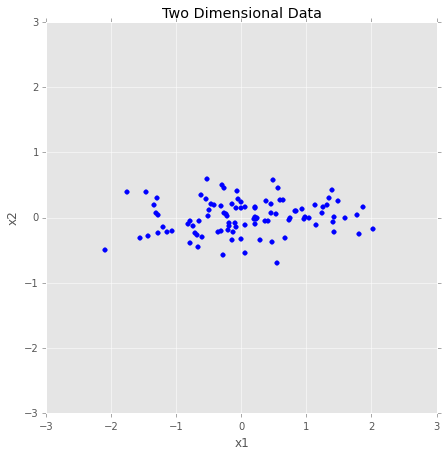

In [6]:
#Use the data prior to rotating it
Xr2 = X

fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.scatter(Xr2[:,0], Xr2[:,1], color='blue', marker='o')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Two Dimensional Data")

---
##Now re-collapse the data onto the axes
--

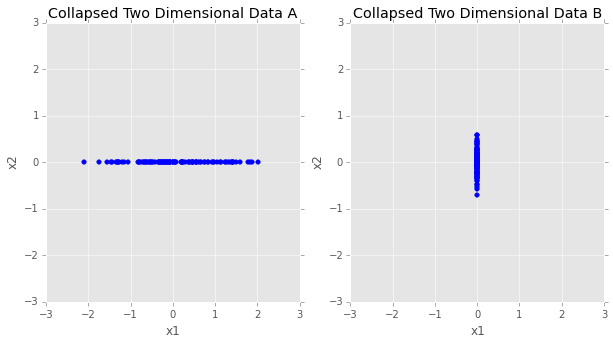

In [7]:
x_plot = np.zeros(m)

fig = plt.figure(figsize = (10, 5))
ax = plt.subplot(121)
ax.scatter(Xr2[:,0], x_plot, color='blue', marker='o')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Collapsed Two Dimensional Data A")

ax = plt.subplot(122)
ax.scatter(x_plot, Xr2[:,1], color='blue', marker='o')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Collapsed Two Dimensional Data B")

---
##and measure the variances
---

In [8]:
print "The variance of Data A is {:5.2f}".format(Xr2[:, 0].std()*Xr[:, 0].std())
print "The variance of Data B is {:5.2f}".format(Xr2[:, 1].std()*Xr[:, 1].std())

The variance of Data A is  0.73
The variance of Data B is  0.10


---
##Without having to rotate the data PCA finds a line along which there is maximum variance within the data
##PCA then projects all of the data onto that line
##Another way of looking at this is that PCA projects the points onto a line such that the sum of squared errors between the points and their projections onto the line is a minimum
---

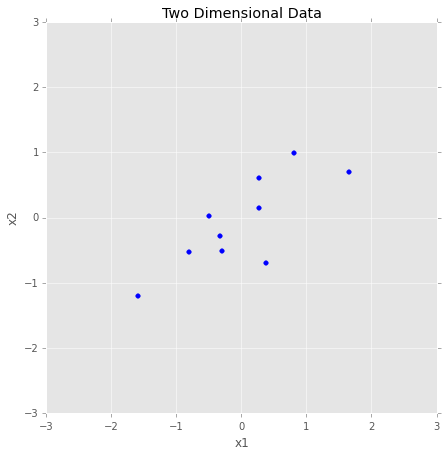

In [29]:
#Same setup again but with just 10 points
m = 10
N = 2
np.random.seed(1)
X = np.zeros((m, N))
X[:,0] = np.random.normal(loc = 0.0, scale = 1.0, size = m)
X[:,1] = np.random.normal(loc = 0.0, scale = 0.5, size = m)

Xr = np.dot(X, rot_matrix(65.0))

fig = plt.figure(figsize = (7,7))
ax = plt.subplot(111)
ax.scatter(Xr[:,0], Xr[:,1], color='blue', marker='o')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Two Dimensional Data")

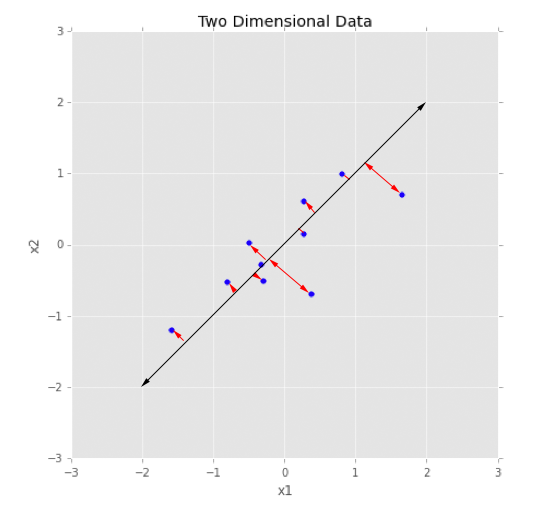

In [10]:
from IPython.display import Image
from IPython.display import display
Image("/Users/mrgholt/GADS-22-NYC/Images/PCA1.png")

---
##- the black line is the projection line
##- the errors are known as projection errors (red lines)
##- minimize the sum of squares of the projection errors
##- minimization of the projection errors finds the optimal projection line
##- this maximizes the variance of the points after the projection
---

---
##Standard practice before using PCA is to center the data and rescale, so zero mean and comparable value ranges
---

---
#The General Case
##N Dimensional data
##Want to reduce it to K-dimensions
##We need K-dimensions to project the data onto so as to minimize the projections errors
##PCA is a linear transformation
##PCA is NOT linear regression
### - In linear regression there is the output variable, $y$, which we are attempting to predict
---

---
##This is linear regression
---

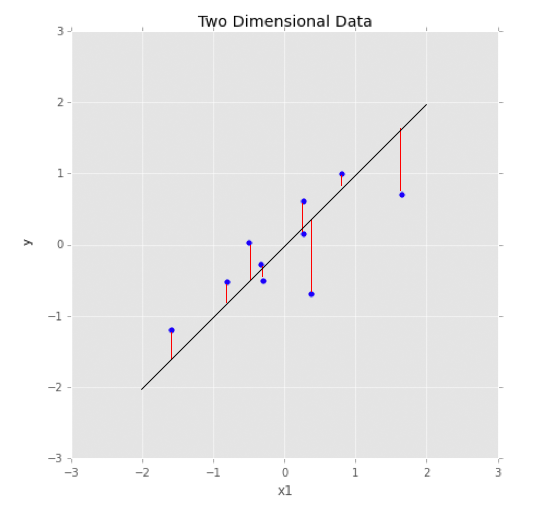

In [11]:
Image("/Users/mrgholt/GADS-22-NYC/Images/PCA2.png")

---
#The Details - for those interested
---

In [12]:
#Center and scale the data
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(Xr)
Xr_scaled = scaler.transform(Xr)

In [13]:
#Get the transform of this matrix
Xr_scaledT = Xr_scaled.T

In [14]:
#Derive the covariance matrix
cov_m = np.dot(Xr_scaledT, Xr_scaled)/9.0

In [15]:
print cov_m

[[ 1.11111111  0.88087932]
 [ 0.88087932  1.11111111]]


In [16]:
np.cov(Xr_scaledT)

array([[ 1.11111111,  0.88087932],
       [ 0.88087932,  1.11111111]])

---
##U,S,V = svd(covariance_matrix)
###svd = singular valued decomposition
###symmetric positive semi-definite
---

In [17]:
#Perform singular valued decomposition on the covariane matrix
U, s, V = np.linalg.svd(np.cov(Xr_scaledT))

In [18]:
print "U shape is ", U.shape
print "U is \n", U
print "s shape is ", s.shape
print "s is \n", s
S=np.zeros((2, 2))
S[0][0] = s[0]
S[1][1] = s[1]
print "Big S is \n", S
print "V shape is ", V.shape
print "V is \n", V

U shape is  (2, 2)
U is 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
s shape is  (2,)
s is 
[ 1.99199043  0.23023179]
Big S is 
[[ 1.99199043  0.        ]
 [ 0.          0.23023179]]
V shape is  (2, 2)
V is 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [19]:
#check that U * S * V really does return the original covariance matrix
temp = np.dot(U,S)
temp1 = np.dot(temp, V)
print temp1
print np.cov(Xr_scaledT)

[[ 1.11111111  0.88087932]
 [ 0.88087932  1.11111111]]
[[ 1.11111111  0.88087932]
 [ 0.88087932  1.11111111]]


---
##Use the first k-columns of the matrix U
---

In [20]:
#Get the first Principal Component - first column of U
PCA_number = 0

U_reduce = U[:, PCA_number]
print "the shape of U reduce is ", U_reduce.shape

U_reduce = U_reduce.reshape(2,1)
U_reduceT = U_reduce.T
print "the first principal component is ", U_reduceT

z = np.dot(U_reduceT, Xr_scaledT)

print "shape of U reduce Transpose is ", U_reduceT.shape
print z

the shape of U reduce is  (2,)
the first principal component is  [[-0.70710678 -0.70710678]]
shape of U reduce Transpose is  (1, 2)
[[-1.82642022  0.33658259  0.4954775   1.14136521 -0.96285193  2.51179657
  -2.21527203  0.69277541 -0.46881681  0.29536372]]


---
##Check against sklearn
---

In [21]:
myPCA = PCA(n_components=1).fit(Xr_scaled)

In [22]:
print myPCA.components_

[[-0.70710678 -0.70710678]]


In [23]:
Xpca = myPCA.transform(Xr_scaled)
print Xpca

[[-1.82642022]
 [ 0.33658259]
 [ 0.4954775 ]
 [ 1.14136521]
 [-0.96285193]
 [ 2.51179657]
 [-2.21527203]
 [ 0.69277541]
 [-0.46881681]
 [ 0.29536372]]


---
##Plot them along a single axis
---

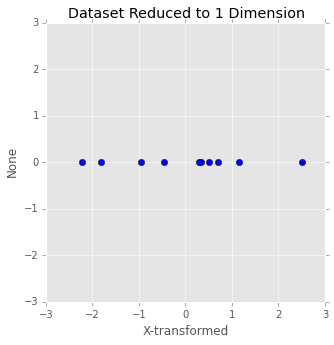

In [24]:
x_plot = np.linspace(1, 10, 10)
x_plot = np.zeros(10)
fig = plt.figure(figsize = (5,5))
ax = plt.subplot(111)
ax.plot(Xpca, x_plot, 'bo')
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.0, 3.0)
ax.set_title("Dataset Reduced to 1 Dimension")
ax.set_xlabel("X-transformed")
ax.set_ylabel("None")

---
#A Final Example : 3-D to 2-D
---

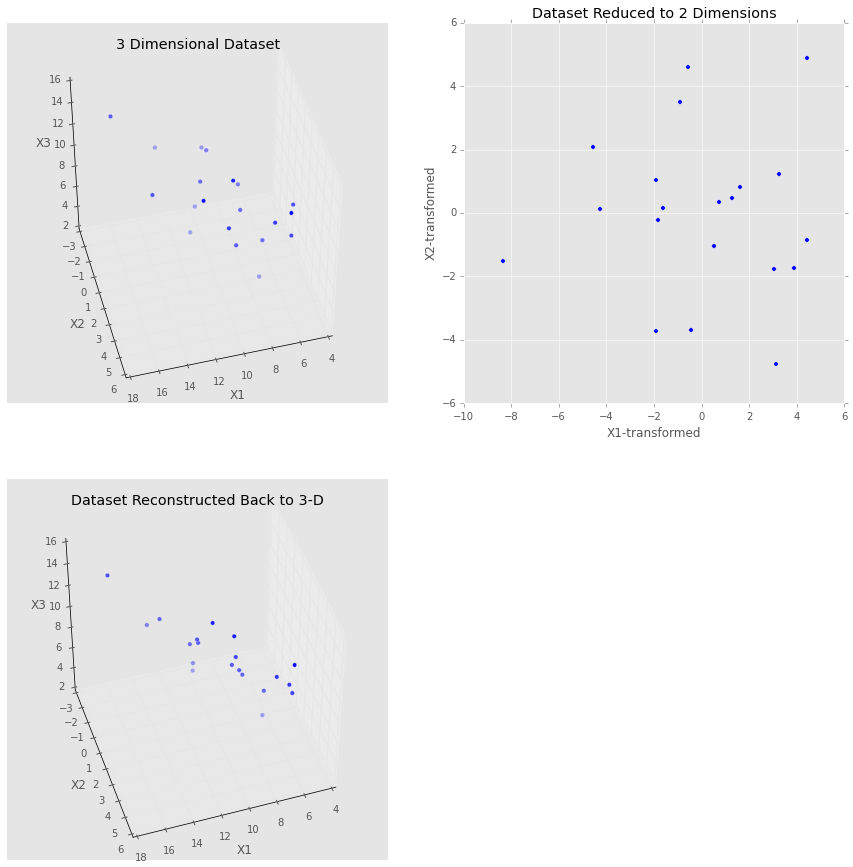

In [72]:
#number of training examples
m = 20

#number of features
N = 3

#number of distinct clusters or groupings or 'blobs'
num_blobs = 1

#using sklearn's 'make_blobs' functionality to make some clusters of data
#blobs also returns an array, y, which contains the identity of the blob each pair of points belongs to
X, y = make_blobs(n_samples = m, n_features = N, centers=num_blobs, cluster_std=2.5, random_state=4)

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.elev=45.0
ax.azim=75.0
surf = ax.scatter(X[:,0], X[:,1], X[:,2])
ax.set_title("3 Dimensional Dataset")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")

myPCA = PCA(n_components=2).fit(X)
new_X =  myPCA.transform(X)

X[:, 0] = new_X[:,0]
X[:, 1] = new_X[:,1]
X[:, 2] = 0.0

ax1 = plt.subplot(222)
ax1.scatter(X[:,0], X[:,1])
ax1.set_title("Dataset Reduced to 2 Dimensions")
ax1.set_xlabel("X1-transformed")
ax1.set_ylabel("X2-transformed")


ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.elev=45.0
ax.azim=72.0
recovered_X = myPCA.inverse_transform(new_X)
surf = ax.scatter(recovered_X[:,0], recovered_X[:,1], recovered_X[:,2])
ax.set_title("Dataset Reconstructed Back to 3-D")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")